# Pandas 3

Alberto Quaini - I thank Natasha for helping me jump some hurdles.

### Import libraries

In [103]:
from matplotlib import pyplot as plt
from pydataset import data
import pandas as pd

## Problem 1

### Iris

In [47]:
iris = data('iris')

In [41]:
def plot_iris(x, y, leg_loc = 'upper center'):
    colors = ['red', 'green', 'blue']
    fig, ax = plt.subplots()
    for species, color in zip(iris['Species'].unique(), colors):
        iris[iris['Species'] == species].plot(x=x, y=y, kind='scatter', 
            ax=ax, c=color, label=str(species))
    plt.legend(loc = leg_loc)
    plt.grid(True)
    plt.show()

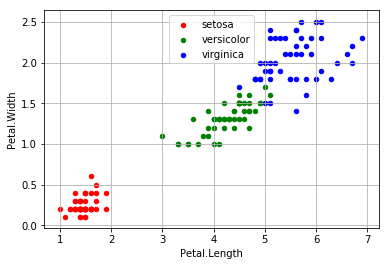

In [42]:
plot_iris('Petal.Length', 'Petal.Width')

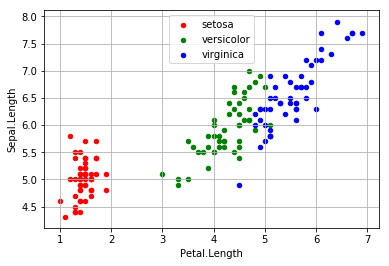

In [43]:
plot_iris('Petal.Length', 'Sepal.Length')

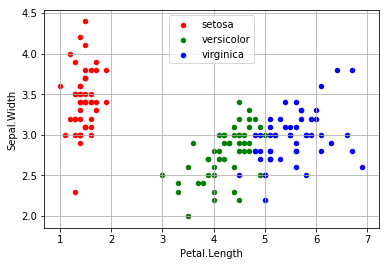

In [44]:
plot_iris('Petal.Length', 'Sepal.Width')

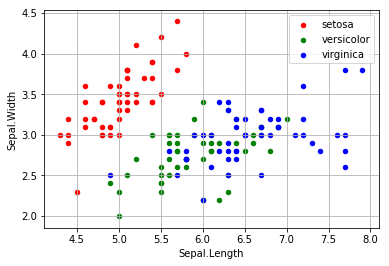

In [45]:
plot_iris('Sepal.Length', 'Sepal.Width', 'upper right')

Setosa is the easiest species to distinguish just by looking at petal length or width.

### Poisons

In [95]:
poisons = data('poisons')

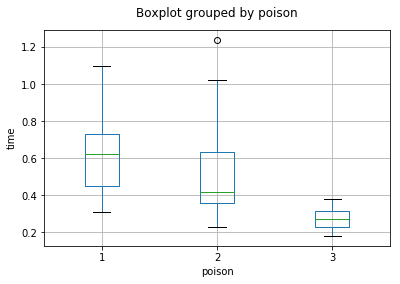

In [60]:
plt.figure
poisons.boxplot(by='poison')
plt.title('')
plt.xlabel('poison')
plt.ylabel('time')
plt.show()

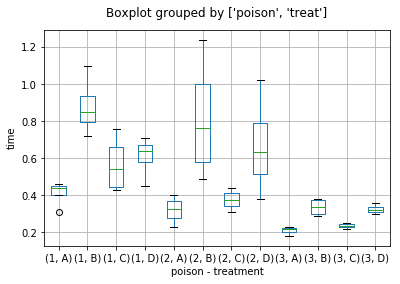

In [69]:
plt.figure
poisons.boxplot(by=['poison','treat'])
plt.title('')
plt.xlabel('poison - treatment')
plt.ylabel('time')
plt.show()

Poison 3 is the deadliest. Treatment A is the most effective for all kind of poison.

## Diamonds

In [79]:
diamonds = data('diamonds')

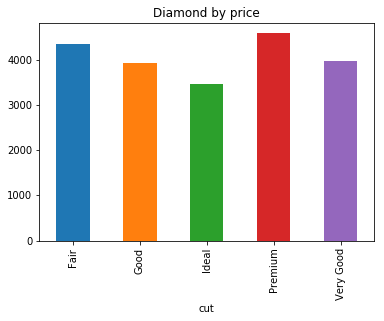

In [77]:
diamonds.groupby('cut')['price'].mean().plot(kind='bar')
plt.title('Diamond by price')
plt.show()

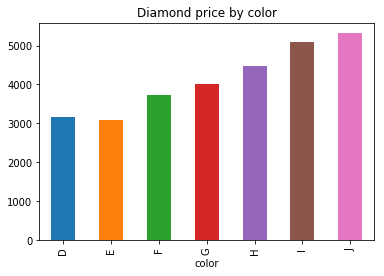

In [78]:
diamonds.groupby('color')['price'].mean().plot(kind='bar')
plt.title('Diamond price by color')
plt.show()

Clearly, higher cut quality translates in higher price. Also, color shades impact price.

In [92]:
print('mean carat for Fair cut with color H')
diamonds[(diamonds['color']=='H') & (diamonds['cut'] == 'Fair')][['carat']].mean()

mean carat for Fair cut with color H


carat    1.219175
dtype: float64

In [93]:
print('mean carat for Ideal cut with color H')
diamonds[(diamonds['color']=='H') & (diamonds['cut'] == 'Ideal')][['carat']].mean()

mean carat for Ideal cut with color H


carat    0.799525
dtype: float64

Maybe the higher carat for Fair cuts with color H with respect to Ideal cuts with the same color.

## Problem 2

In [104]:
titanic = pd.read_csv('titanic.csv')

In [106]:
titanic.groupby('Embarked')['Survived'].mean()

Embarked
C    0.555556
Q    0.357724
S    0.332604
Name: Survived, dtype: float64

It appears that passengers from C had more luck.

In [108]:
pd.pivot_table(titanic, values='Survived', index='Embarked', columns='Sex')

Sex,female,male
Embarked,,
C,0.902655,0.305732
Q,0.616667,0.111111
S,0.680412,0.170144


But maybe this is due to the sex proportions (lady had priority during the rescue?)

In [109]:
pd.pivot_table(titanic, values='Survived', index='Embarked', columns='Pclass')

Pclass,1.0,2.0,3.0
Embarked,,,
C,0.687943,0.571429,0.366337
Q,0.666667,0.285714,0.353982
S,0.559322,0.417355,0.210101


In [110]:
pd.pivot_table(titanic, values='Survived', index='Embarked', columns='Pclass', aggfunc='count')

Pclass,1.0,2.0,3.0
Embarked,,,
C,141,28,101
Q,3,7,113
S,177,242,495


Or, even more likely, it was due to differences in ticket class?